In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.cm
from scipy.stats import norm

cm = plt.cm.get_cmap('Reds')
cm1 = plt.cm.get_cmap('Blues')
cm2  = plt.cm.get_cmap('Purples')

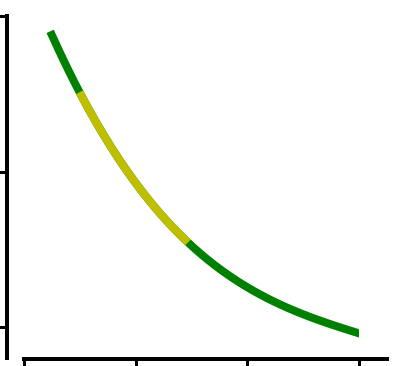

In [47]:
#Figure 5: Information maximization
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))
rho = np.linspace(0,1,21)
p = np.linspace(0.050,0.6, 12)
pf = [float(s) for s in p]
rhonew = np.linspace(0,1,50)
data= np.zeros((len(pf),len(rho)))
rhomax = np.zeros(len(pf))
datanew = np.zeros((len(pf), len(rhonew)))
for i,r in enumerate(rho):
    for j,s in enumerate(pf):
        filename = './Numerics/info_cocktail2_lnkappa4_nb128_rho%.2f_p%.3f_nt500_ns1e4_nsi1e5.dat' %(r,s)
        data[j][i] = np.loadtxt(filename, skiprows = 1)
for i in range(len(pf)):
    s = UnivariateSpline(rho, data[i], s=1)
    datanew[i] = s(rhonew)
    rhomax[i] = rhonew[np.argmax(datanew[i])]
s = UnivariateSpline(pf, rhomax, s=1)
pnew = np.linspace(0.050,0.7,50)
rhomax_new = s(pnew)

pexp1 = (pnew < 0.3)*(pnew > 0.1)
pexp2 = (p < 0.3)*(p > 0.1)
#axis.plot(p,rhomax, 'go', markersize = 14, mew = 3)
axis.plot(pnew,rhomax_new, 'g-', linewidth = 8)
#axis.plot(p[pexp2],rhomax[pexp2], '-', color = 'y', linewidth = 8)
axis.plot(pnew[pexp1],rhomax_new[pexp1], '-', color = 'y', linewidth = 8)
axis.set_ylim(-0.05,1)
axis.set_xlim(0,0.6)
axis.yaxis.set_major_locator(MultipleLocator(0.5))
axis.xaxis.set_major_locator(MultipleLocator(0.2))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.spines['left'].set_bounds(-0.1,1)
axis.spines['bottom'].set_bounds(0,0.65)
fig.savefig("fig5_info_cocktail.eps")
plt.show()

0.05 0.25 0.44999999999999996


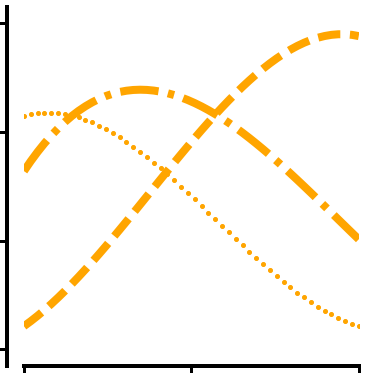

In [17]:
#Figure 5: Information maximization inset
plt.close("all")
col = 'orange'
fig,axis = plt.subplots(1,1,figsize = (6,6))
p1 = 0
p2 = 4
p3 = 8
print(pf[p1], pf[p2], pf[p3])
axis.plot(rhonew,datanew[p1], '--', label = "p = %.2f" %pf[p1], color = col, linewidth = 8)
axis.plot(rhonew,datanew[p2], '-.',label = "p = %.2f" %pf[p2],color = col, linewidth = 8)
axis.plot(rhonew,datanew[p3], '.',label = "p = %.2f" %pf[p3], color = col, linewidth = 8, ms = 8)
#ax.plot(datanew[7],rhonew, '-',color = 'gray')
axis.set_ylim(0.2,0.8)
axis.set_xlim(0,1)
axis.yaxis.set_major_locator(MultipleLocator(0.2))
axis.xaxis.set_major_locator(MultipleLocator(0.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.spines['left'].set_bounds(0.17,0.83)
axis.spines['bottom'].set_bounds(0,1)

#fig.tight_layout()
fig.savefig("fig5_info_cocktail_inset.eps")
plt.show()

In [182]:
#Figure 5: Glomeruli and mixtures
N = 16
n = 4 
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
xi,yi = np.meshgrid(x,y)
xi = xi + 0.05*np.random.uniform(0,1,(N,N))
yi = yi + 0.05*np.random.uniform(0,1,(N,N))

rho = 0.0
b = 16
lnkappa = np.random.randn(b,N,N)
lneta = np.random.randn(b,N,N)
lneta = rho*lnkappa + np.sqrt(1 - rho*rho)*lneta
lnkappa = -4*lnkappa
kappa = np.exp(lnkappa)

#lneta *= 0
eta = np.exp(lneta)

p = 0.3

def pattern(eta):
    return 1.0/(1.0 + (1.0/eta)**n)

def pattern_c(eta, kappa, c):
    return 1.0/(1.0 + ((1.0 + c/kappa)/(eta*c/kappa))**n)
    
def mixture(eta, kappa):
    kappa_sum = np.sum(1.0/kappa, axis = 0)
    etakappa_sum = np.sum(eta/kappa, axis = 0)
    eta_eff = etakappa_sum/kappa_sum
    return pattern(eta_eff)

def mixture_c(eta, kappa, c):
    kappa_sum = 1.0 + np.sum(c/kappa, axis = 0)
    etakappa_sum = np.sum(c*eta/kappa, axis = 0)
    return 1.0/(1.0 + (kappa_sum/etakappa_sum)**n)


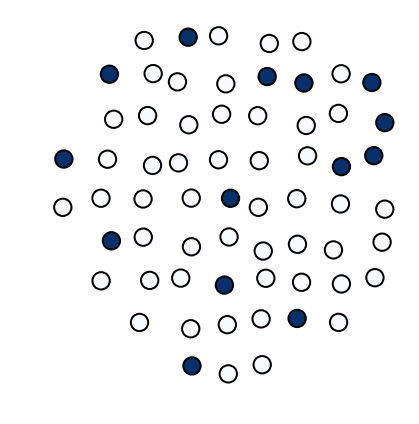

In [185]:
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))

lnc = 8*np.log(10)*np.ones((b,N,N))
c = np.exp(lnc)

t = 1.0/(1.0+ np.exp(-n*norm.ppf(1 - p)))
circ = np.sqrt(xi**2 + yi**2) < 0.6
nmix = 16
#axis.scatter(xi[circ],yi[circ], c = (pattern_c(eta[0], kappa[0], c[0]) > t)[circ], edgecolors = 'k',linewidths = 2, s = 300, cmap = cm1 , vmin = 0.1, vmax =1, alpha = 1)
axis.scatter(xi[circ],yi[circ], c = (mixture_c(eta[:nmix],kappa[:nmix],c[:nmix]) > t)[circ], linewidths = 2, s = 300,edgecolors = 'k', cmap = cm1 , vmin = 0.1, vmax =1, alpha = 1)
plt.axis('off')
fig.tight_layout()
plt.show()
fig.savefig("fig5_glom_n%d_rho0.eps" %nmix, dpi = 200)

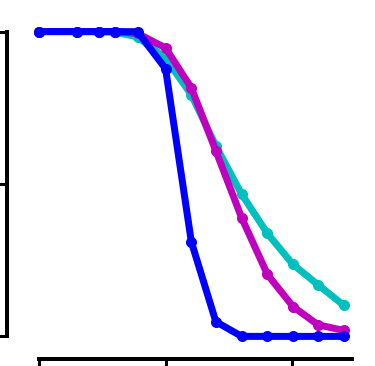

In [71]:
#Figure 5: Information vs number of background odors
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = ['Tahoma']
#plt.switch_backend('Cairo') 
nb = np.round(np.logspace(0,8*np.log10(2),13))
nb = nb[:]
data = np.zeros((3,len(nb)))
for i,b in enumerate(nb):
    data[0][i] = np.loadtxt("./Numerics/info_cocktail3_lnkappa4_nb%d_rho0.0_p0.30_nt500_ns1e4_nsi1e5.dat" %int(b), skiprows = 1)
    data[1][i] = np.loadtxt("./Numerics/info_cocktail3_lnkappa4_nb%d_rho0.5_p0.30_nt500_ns1e4_nsi1e5.dat" %int(b), skiprows = 1)
    data[2][i] = np.loadtxt("./Numerics/info_cocktail3_lnkappa4_nb%d_rho1.0_p0.30_nt500_ns1e4_nsi1e5.dat" %int(b), skiprows = 1)
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))
axis.semilogx(nb, data[0], 'co-', linewidth = 7, markersize = 10)
axis.semilogx(nb, data[1], 'mo-', linewidth = 7, markersize = 10)
axis.semilogx(nb, data[2], 'bo-', linewidth = 7, markersize = 10)
axis.set_ylim(-0.02,1.05)
axis.yaxis.set_major_locator(MultipleLocator(0.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.spines['left'].set_bounds(0.0,1)
axis.spines['bottom'].set_bounds(1e0,3e2)
fig.savefig("fig5_info_nb.eps")
plt.show()

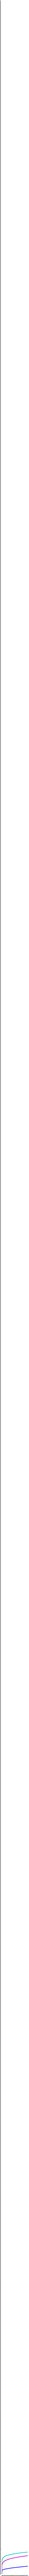

In [70]:
#Figure 5: Component separation, main
x = np.linspace(0.5,0.95,32)
p = 0.5    
datahit = np.zeros((3,len(x)))
datafp = np.zeros((3,len(x)))
rho = [0.0, 0.5, 1.0]
for i in range(3):
    for j in range(len(x)):
        datahit[i][j] = np.loadtxt('./Numerics/compsep_p%.1f_rho%.1f_nt500_maxt20_ntrials50_thr%.2f.dat'%(p,rho[i],x[j]), skiprows = 1, usecols = (0)) 
        datafp[i][j] = np.loadtxt('./Numerics/compsep_p%.1f_rho%.1f_nt500_maxt20_ntrials50_thr%.2f.dat' %(p,rho[i],x[j]), skiprows = 1, usecols = (1))
        
plt.close("all")
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = ['Tahoma']
fig,axis= plt.subplots(1,1,figsize = (6,6))
axis.plot(datafp[0], datahit[0], 'co-', markersize = 6, linewidth = 7)
axis.plot(datafp[1], datahit[1], 'mo-', markersize = 6, linewidth = 7)
axis.plot(datafp[2], datahit[2], 'bo-', markersize = 6, linewidth = 7)
axis.set_ylim(0,0.8)
axis.set_xlim(0,25)
axis.yaxis.set_major_locator(MultipleLocator(0.4))
axis.xaxis.set_major_locator(MultipleLocator(10))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.spines['left'].set_bounds(0.0,82)
axis.spines['bottom'].set_bounds(0,25)
fig.savefig("fig5_compsep_roc_p%.1f.eps" %p)
plt.show()

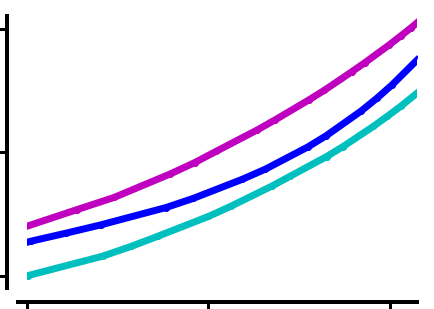

In [68]:
#Figure 5: Component separation, main
x = np.linspace(0.5,0.95,32)
p = 0.2
datahit = np.zeros((3,len(x)))
datafp = np.zeros((3,len(x)))
rho = [0.0, 0.5, 1.0]
for i in range(3):
    for j in range(len(x)):
        datahit[i][j] = np.loadtxt('./Numerics/compsep_p%.1f_rho%.1f_nt500_maxt20_ntrials50_thr%.2f.dat'%(p,rho[i],x[j]), skiprows = 1, usecols = (0)) 
        datafp[i][j] = np.loadtxt('./Numerics/compsep_p%.1f_rho%.1f_nt500_maxt20_ntrials50_thr%.2f.dat' %(p,rho[i],x[j]), skiprows = 1, usecols = (1))
        
plt.close("all")
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = ['Tahoma']
fig,axis= plt.subplots(1,1,figsize = (7,5))
axis.semilogx(datafp[0], datahit[0], 'co-', markersize = 6, linewidth = 7)
axis.semilogx(datafp[1], datahit[1], 'mo-', markersize = 6, linewidth = 7)
axis.semilogx(datafp[2], datahit[2], 'bo-', markersize = 6, linewidth = 7)
axis.set_ylim(0.18,0.62)
axis.set_xlim(1e-4,2e0)
axis.yaxis.set_minor_locator(MultipleLocator(0.08))
axis.yaxis.set_major_locator(MultipleLocator(0.2))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )
axis.set_xticks([1e-4,1e-2,1e0])
axis.spines['left'].set_bounds(0.18,0.62)
axis.spines['bottom'].set_bounds(8e-5,2e0)

#fig.tight_layout()
fig.savefig("fig5_compsep_roc_p%.1f_inset.eps" %p)
plt.show()